## <font color = 'green' id = "section" >Notebook 2: Apprentissage automatique, Classification: Sanitaire</font>

# <font color="blue">Sommaire</font>
1. [Importation des librairies](#section_1)    
2. [Lecture du Dataset](#section_2) 
3. [Approche de modélisation](#section_3)     
    3.1. [Separation de la variable prédictive des explicatives](#section_3_1)    
    3.2. [Separation variables numériques et catégorielles](#section_3_2)   
    3.3. [Création du preprocessor](#section_3_3)    
    3.4. [Séparation données train et test](#section_3_4) 
4. [Classification](#section_4)       
    4.1 [DymmyClassifier](#section_4_1)   
    4.2 [LogisticRegression](#section_4_2)   
    4.3 [SGDClassifier](#section_4_3)   
    4.4 [Réseau de neuronne](#section_4_4)  
    4.5 [RandomForestClassifier](#section_4_5)  
    4.6 [LGBMClassifier](#section_4_6)
    
    
    
 

# <font color ='red' id = 'section_1' > 1.Importation des librairies </font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import ast
import scipy as sp
import time
import pickle
from datetime import datetime
from get_feat_names import *
#-------------------------------------------------------------------
from tqdm import tqdm
import gc
#------------------------------------------------------------------
import plotly.graph_objs as go
import plotly.express as px
from textwrap import wrap
#-------------------------------------------------
import sklearn
from sklearn.model_selection import train_test_split

#-------------------------------------------------
#from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor, make_column_transformer
#from pycaret.internal.preprocess.target.TransformedTargetClassifier import TransformedTargetClassifier
#--------------------------------------------------------
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression, SGDClassifier

#--------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
#------------------------------------------------
from xgboost import XGBClassifier
#-----------------------------------------
from lightgbm import LGBMClassifier

#-----------------------------------------------------------
from sklearn.model_selection import GridSearchCV

#-----------------------------------------------------
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#----------------------------------------------
from sklearn.dummy import DummyClassifier

#-----------------------------------
from sklearn.metrics import *

#------------------------------------------------------
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import ClassificationReport

#-------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical
from keras import regularizers
from keras import backend as K

In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

# Checklist

## Description
La publication des résultats des contrôles sanitaires dans le secteur alimentaire (**restaurants, cantines, abattoirs, etc.**) est une attente légitime des citoyens qui participe à l’amélioration de la confiance du consommateur. Prévue par la loi d’Avenir pour l’agriculture, l’alimentation et la forêt, du 13 octobre 2014, cette mesure s’inscrit dans une évolution vers une plus grande transparence de l’action de l’État.


**Quels sont secteurs d’activité concernés ?**

Il s’agit de rendre public le résultat des contrôles officiels en sécurité sanitaire des aliments réalisés dans tous les établissements de la chaîne alimentaire : **abattoirs, commerces de détail (métiers de bouche, restaurants, supermarchés, marchés, vente à la ferme, etc.), restaurants collectifs et établissements agroalimentaires.**


# Objectif

Notre objectif majeur dans ce projet en particulier ce notebbok 2 comprend les étapes suivantes: 
 
**1.** *Preprocessing*

**2.** *Classification*

**3.** *Conclusion*


# Description des données
Lien 1: https://www.data.gouv.fr/fr/pages/thematiques-a-la-une/

Lien vers les données: https://www.data.gouv.fr/fr/datasets/resultats-des-controles-officiels-sanitaires-dispositif-dinformation-alimconfiance/


# <font color="red" id="section_2"> 2. Chargement, lecture, apercu et infos des données </font>

In [4]:
data_model = pd.read_csv("Data_model_classi.csv")

In [5]:
display(data_model.head(2))
display(data_model.tail(2))

,APP_Libelle_etablissement,Code_postal,Libelle_commune,Synthese_eval_sanit,filtre_activite,Latitude,Longitude,Adress_Rue,Adress_Avenue,Adress_Chemin,Adress_Place,Adress_Boulevard,Adress_Route,Adress_quai
0,DE CERGY NEUVILLE (SYND MIXTE D'ETUDE AMENA GE...,95800,CERGY,Urgent_Améliorer,Autres,45.883682,1.814627,1,0,0,0,0,0,0
1,CODIPEX (CONSORTIUM EUROPE ECHANG COMMERC INTE...,92160,ANTONY,Très satisfaisant,Autres,48.732041,2.305533,1,1,0,0,0,0,0


,APP_Libelle_etablissement,Code_postal,Libelle_commune,Synthese_eval_sanit,filtre_activite,Latitude,Longitude,Adress_Rue,Adress_Avenue,Adress_Chemin,Adress_Place,Adress_Boulevard,Adress_Route,Adress_quai
32259,OGEC SOC ELISABETH DE PLAISANC,75014,Paris 14e Arrondissement,Satisfaisant,Restauration collective,48.835253,2.316900,1,0,0,0,0,0,0
32260,CENTRE HOSPITALIER DU FOREZ,42600,Montbrison,Satisfaisant,Restauration collective,45.612674,4.046673,1,1,0,0,0,0,0


In [6]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32261 entries, 0 to 32260
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   APP_Libelle_etablissement  32261 non-null  object 
 1   Code_postal                32261 non-null  object 
 2   Libelle_commune            32261 non-null  object 
 3   Synthese_eval_sanit        32261 non-null  object 
 4   filtre_activite            32261 non-null  object 
 5   Latitude                   32261 non-null  float64
 6   Longitude                  32261 non-null  float64
 7   Adress_Rue                 32261 non-null  int64  
 8   Adress_Avenue              32261 non-null  int64  
 9   Adress_Chemin              32261 non-null  int64  
 10  Adress_Place               32261 non-null  int64  
 11  Adress_Boulevard           32261 non-null  int64  
 12  Adress_Route               32261 non-null  int64  
 13  Adress_quai                32261 non-null  int

In [7]:
data_model.duplicated().sum()

0

In [8]:
data_model.shape

(32261, 14)

## Commentaire:
Nous allons supprimer les coordonnées géographique, qui n'apporte pas de valeurs dans la claffication.

In [9]:
data_model.drop(['Latitude', 'Longitude'], axis = 1, inplace = True)

# <font color="red" id="section_3" > 3. Approche modélisation

## <font color="red" id="section_3_1" > 3.1  Separation de la variable prédictive des explicatives

In [10]:
Y = data_model['Synthese_eval_sanit']
X = data_model.drop(['Synthese_eval_sanit'] ,axis =1 )

In [11]:
data_model_neu = data_model.copy()

In [12]:
X.shape

(32261, 11)

## <font color="red" id="section_3_2" > 3.2 Separation variables numériques et catégorielles

In [13]:
var_num = X.select_dtypes(include = ['float', 'int']).columns.to_list()
var_num

['Adress_Rue',
 'Adress_Avenue',
 'Adress_Chemin',
 'Adress_Place',
 'Adress_Boulevard',
 'Adress_Route',
 'Adress_quai']

In [14]:
var_cat = X.select_dtypes(include = ['object']).columns.to_list()
var_cat

['APP_Libelle_etablissement',
 'Code_postal',
 'Libelle_commune',
 'filtre_activite']

## <font color="red" id="section_3_3" > 3.3  Création du preprocessor
  
 Ici, nous allons normaliser les données numérique avec **MinMaxScaler** et encoder les catégorielles avec **OneHotEncoder**, le tout dans une pipeline qu'on pourra appeler à chaque fois.

In [15]:
#numerical_pipiline = Pipeline([ ('scaler', MinMaxScaler())])
#categoriacal_pipiline = Pipeline([('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
#--------------------------------------------------------------------------------------------------------------------

preprocessor = ColumnTransformer([
                          ( 'num_process', MinMaxScaler(), var_num),
                          ('categ_process', OneHotEncoder(handle_unknown = 'ignore'), var_cat),  
                        ])

## <font color="red" id="section_3_4" > 3.4  Séparation données train et test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state =5)

In [17]:
X_test.shape

(6453, 11)

## Fonctionnement de SMOTE

Tutorial = https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

# <font color="red" id="section_4" > 4.  Classification
    
Pour chacun de nos modèles:
   * **DummyClassifier**,
   * **LogisticRegression**, 
   * **SGDClassifier**, 
   * **Reseau de neuronne**
   * **RandomForestClassifier**,
   * **XGBClassifier**,
   * **LGBMClassifier**, 
    
nous allons classifier les élement selon les niveau de contrôle sanitaire et etablir des matrices de confusion.

## <font color="red" id="section_4_1" > 4.1  Dummy Classifier

### <font color="red" id="section_4_1_1" > 4.1.1 Entrainement

In [18]:
model_dum = Pipeline([('preprocessor', preprocessor),
                     ('oversampling', SMOTE(random_state = 5)),
                     ('classfier', DummyClassifier(random_state= 5))
         ])
model_dum.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_process', MinMaxScaler(),
                                                  ['Adress_Rue',
                                                   'Adress_Avenue',
                                                   'Adress_Chemin',
                                                   'Adress_Place',
                                                   'Adress_Boulevard',
                                                   'Adress_Route',
                                                   'Adress_quai']),
                                                 ('categ_process',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['APP_Libelle_etablissement',
                                                   'Code_postal',
                                                   'Libelle_commune',
                                                   'filtre_activite'])])),
                ('oversampling', SMOTE(random_state=5)),
                ('classfier', DummyClassifier(random_state=5))])

### <font color="red" id="section_4_1_2" > 4.2  Prediction et metrique de performance

In [19]:
y_pred_dum = model_dum.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred_dum))
print('-'*60)
print( "Le fbeta core vaut:", fbeta_score(y_test, y_pred_dum,average = 'weighted', beta = 10))

                   precision    recall  f1-score   support

     Satisfaisant       0.56      1.00      0.72      3600
Très satisfaisant       0.00      0.00      0.00      2485
 Urgent_Améliorer       0.00      0.00      0.00       368

         accuracy                           0.56      6453
        macro avg       0.19      0.33      0.24      6453
     weighted avg       0.31      0.56      0.40      6453

------------------------------------------------------------
Le fbeta core vaut: 0.5535367108047111


### Matrice de confusion

In [21]:
def confusion_matrix_visual(y_pred_model, model):  
    cf_matrix =  confusion_matrix(y_test, y_pred_model)
    group_names = ['True Satisf','False_satisf vs T_satisf','False_satisf vs Urg',
                   'False T_Satisf vs Satisf','True_Tsatisf','False_Tsatisf vs Urg',
                  'False_Urg vs Satisf','False_Urg vs T_satisf','True Urg']

    group_counts = ["{0:0.0f}".format(value) for value in
    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(3,3)

    plt.figure(figsize =(8,6))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', cbar = False, linewidth =1.6)

    ax.set_title("Confusion Matrix pour {}".format(model),  fontsize = 16);
    ax.set_xlabel('\n Classes predictes', fontsize = 14)
    ax.set_ylabel('Classes réelles ', fontsize = 14);

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Satisf','T_satisf', 'Urgent'])
    ax.yaxis.set_ticklabels(['Satisf','T_satisf', 'Urgent'])

    plt.show()

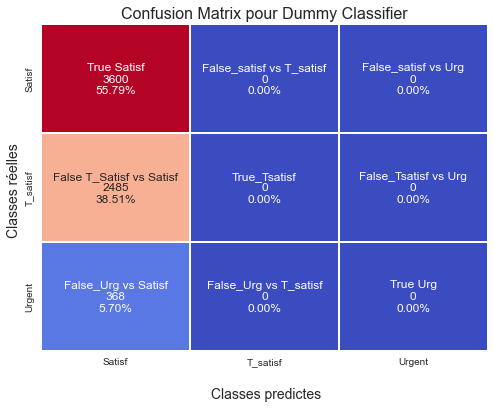

In [22]:
confusion_matrix_visual(y_pred_dum, 'Dummy Classifier')

# Commentaire:

Le model **DummyClassifier** est un modèle de référence, il ne se soucis même  pas de données pour classer. 
Nous l'avions utiliser dans le seul but de comparer ceux plus complexes que nous verrons ci-dessus.

## <font color="red" id="section_4_2" > 4.2  Logistic Regression
    
Lien documenation:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### <font color="red" id="section_4_2_1" > 4.2.1  Optimisation de paramètre

In [23]:
t0 = time.time()
params_log = {'classifier__penalty': ["l1", "l2"],
             'classifier__C': np.linspace(0, 30, 4)}

pipe_log = Pipeline([('preprocessor', preprocessor),
                      ('Oversampling', SMOTE(random_state = 5)),
                      ('classifier' ,LogisticRegression(random_state= 5, verbose = 0))
                     ])

grid_log = GridSearchCV(pipe_log,
                        params_log,
                        cv = 4,
                        n_jobs = -1,
                        verbose = 10
                       )

grid_log.fit(X_train, y_train)
print("Le temps elapsed:", time.time() - t0)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Le temps elapsed: 582.1848559379578


In [24]:
df_results_log = pd.DataFrame.from_dict(grid_log.cv_results_).sort_values(by= 'rank_test_score', ascending = True)
df_results_log.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,59.847917,7.419448,0.521040,0.069499,20.0,l2,"{'classifier__C': 20.0, 'classifier__penalty':...",0.600899,0.608803,0.603534,0.608958,0.605549,0.003460,1
3,92.733637,22.609892,4.591861,3.850960,10.0,l2,"{'classifier__C': 10.0, 'classifier__penalty':...",0.597644,0.614073,0.599504,0.607409,0.604657,0.006557,2
7,55.220796,9.116803,1.835890,2.694343,30.0,l2,"{'classifier__C': 30.0, 'classifier__penalty':...",0.599504,0.608803,0.600279,0.607254,0.603960,0.004114,3


### Affichage des meilleurs paramètres

In [25]:
def affichage_result_optim(grid_search):
    
    df_results = pd.DataFrame.from_dict(grid_search.cv_results_).sort_values(by= 'rank_test_score', ascending = True)
    best_score = np.round(df_results[df_results['rank_test_score']==1]['mean_test_score'].mean(), 2)
    best_params = grid_search.best_params_
    Time_mean_fit = np.round((df_results['mean_fit_time']*X_train.shape[0]).mean(), 2)
    print("Le meileur score est: {}, \nLes meilleurs paramètres sont:{} \nLe temps total moyen de fit est: {}".format(best_score,
                                                                                    best_params,Time_mean_fit ))
    return df_results


In [26]:
df_results_log = affichage_result_optim(grid_log)

Le meileur score est: 0.61, 
Les meilleurs paramètres sont:{'classifier__C': 20.0, 'classifier__penalty': 'l2'} 
Le temps total moyen de fit est: 1686385.32


### <font color="red" id="section_4_2_2" > 4.2.2  Entrainement du model

In [27]:
t0 = time.time()
model_log = Pipeline([('preprocessor', preprocessor),
                      ('Oversampling', SMOTE(random_state = 5)),
                      ('classifier', LogisticRegression(C= 20, penalty = 'l2', random_state = 5, verbose = 0))
                     ])
model_log.fit(X_train, y_train)
print("Le temps elapsed:", time.time() - t0)

Le temps elapsed: 17.52773666381836


### <font color="red" id="section_4_2_3" > 4.2.3  Prediction et mesure de performance

In [28]:
###Prediction
y_pred_log = model_log.predict(X_test)
y_pred_log_train = model_log.predict(X_train)

### Metrics de performances

In [29]:
print( "Le score de training vaut:", accuracy_score(y_train, y_pred_log_train))
print('-'*60)
print( "Le score de cohen_kappa vaut:", cohen_kappa_score(y_test, y_pred_log)) # Excell si sup 0.8
print('-'*60)
print( "Le coefficient  de correlation de Matthews vaut:", matthews_corrcoef(y_test, y_pred_log)) # Excell si sup 0.7
print('-'*60)
print(classification_report(y_test, y_pred_log))
print('-'*60)
print( "Le fbeta core vaut:", fbeta_score(y_test, y_pred_log,average = 'weighted', beta = 10))

Le score de training vaut: 0.9671032238065717
------------------------------------------------------------
Le score de cohen_kappa vaut: 0.247098389403679
------------------------------------------------------------
Le coefficient  de correlation de Matthews vaut: 0.24930758663796662
------------------------------------------------------------
                   precision    recall  f1-score   support

     Satisfaisant       0.65      0.73      0.69      3600
Très satisfaisant       0.57      0.51      0.54      2485
 Urgent_Améliorer       0.29      0.12      0.17       368

         accuracy                           0.61      6453
        macro avg       0.50      0.46      0.47      6453
     weighted avg       0.60      0.61      0.60      6453

------------------------------------------------------------
Le fbeta core vaut: 0.6127642562761166


#### Matrice de confusion

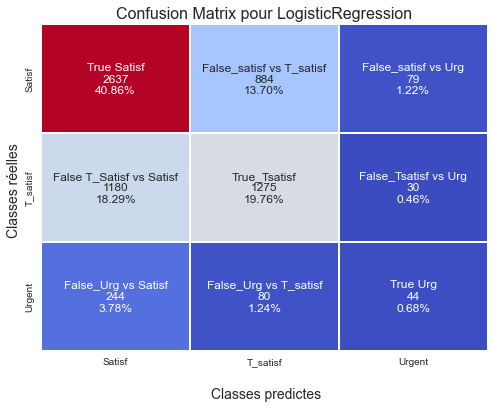

In [30]:
confusion_matrix_visual(y_pred_log, 'LogisticRegression')

## Commentaire: 

* Le **f1 beta score** est de **0.61** ce qui signifie que nous nous avions envirion **61%** de change de predire correctement.On rapelle que le **F1 Score** est la moyenne pondérée entre le **rapelle** et le **précision**.



* Sur la **matrice de confusion**, on voit que le modèle est plus précis avec le  niveau de contrôle **Satisfaisant** plus que les autres. On note par exemple que nous avions  **moins de 1%** de change de classer les **urgent** dans la bonne classe. On pourrait faire de même pour les autres classes.

### <font color="red" id="section_4_2_3" > 4.2.3  Courbes ROC
    
#### Courbes ROCAUC multi-classes
    
* Le visualiseur de Yellowbrick **ROCAUC** permet de tracer des courbes de classification multiclasses. Les courbes **ROC** sont généralement utilisées dans la **classification binaire** et, en fait, la métrique Scikit-Learn **roc_curve** ne convient  que pour les **classificateurs binaires**.  **Yellowbrick** résout ce problème en binarisant la sortie (par classe) ou en utilisant des stratégies de classification un contre reste OVR en anglais (score micro) ou un contre tous OVO (score macro).
    
    
* Les **micro-moyennes** sont calculées à partir de la **somme** de tous les vrais positifs et faux positifs dans toutes les classes et les **macro-moyennes** sont les moyennes des courbes dans toutes les classes  

Lien = https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html#multi-class-rocauc-curves

### Avec macro = False  et micro = True par defaut

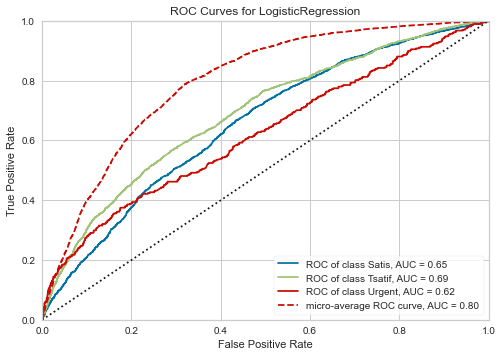

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
visualizer = ROCAUC(model_log, classes=["Satis", "Tsatif", "Urgent"], macro = False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       

## Commentaire: 

Le score moyen micro est de **80%**, ce qui pourrait signifier qu'il  ya **8 chance sur 10** que le modèle predit correctement la classe de l'élément. Ce metrique n'est pas bien adapté pour un dataset déséquilibré qui est le nôtre ici.

Il faudrait plutôt interprété le macro moyen, car toutes les classe sont traitées de la même façon.

### Avec macro = True par defaut et micro = False

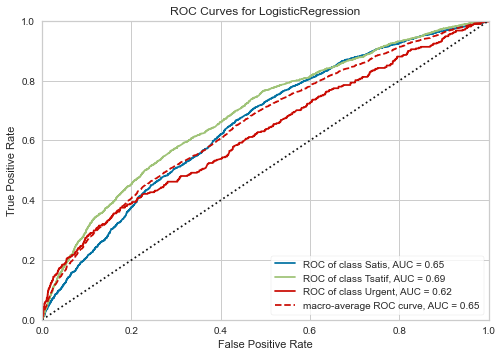

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [32]:
visualizer = ROCAUC(model_log, classes=["Satis", "Tsatif", "Urgent"], micro = False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       

# Commentaire: 
Nous avons un **macro average** de **65%**  qui est une moyenne arithmétique des scores de chaque classe, sur ce on pourrait  l'interpréter de la sorte:
En moyenne, le modèle  a **65%** de change de classer correctement des éléments, ce qui s'accorde mieux avec le score **F1** trouvé plus haut. 


### <font color="red" id="section_4_2_4" > 4.2.4  Coefficient importances 
    
Dans cette section, on va determiner les importances des features dans la prédiction de nos différentes cibles. Et ce l'interpretation devra se faire dans le sens scientifique et non linguistiquement.

In [33]:
coef_log =  model_log.named_steps['classifier'].coef_[0] # Attention à ne prendr que la première composante
df_coef_log = pd.DataFrame(coef_log,index =get_feature_names(preprocessor), columns = ["Importances_coef"]).\
sort_values(by = 'Importances_coef', ascending = False)  #  get_feature_names(preprocessor)
df_coef_log.head(7) 

,Importances_coef
categ_process__x2_Mamoudzou,5.499918
categ_process__x2_Lyon 2e Arrondissement,4.820220
categ_process__x1_75007,4.384551
categ_process__x2_Levallois-Perret,4.087137
categ_process__x1_92120,3.715128
categ_process__x2_Montrouge,3.715128
categ_process__x1_97650,3.687106


In [34]:
df_coef_log_15 = df_coef_log.iloc[:15]

## Visualisation des 15 premiers et derniers coefficients

In [35]:
my_colors  = sns.color_palette("inferno", 15)

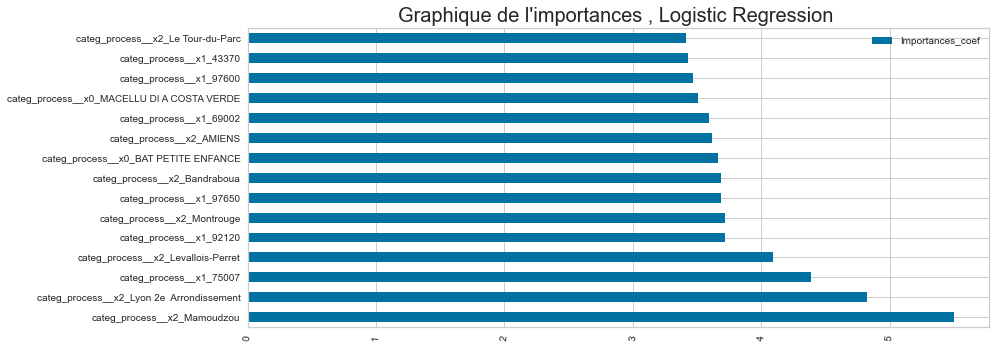

In [36]:
fig, ax = plt.subplots(figsize =(14,5))
df_coef_log_15.plot.barh(ax=ax)
ax.set_title("Graphique de l'importances , Logistic Regression ", fontsize =20)
plt.xticks(rotation =85)
fig.tight_layout()

## Commentaire:
Pour ce model **Logistic Regression**, les facteurs qui influencent positivement la prédiction des classes sont **Mamoudzou**, **Lyon 2e arrondissement** et **Paris 7**. Il faut signaler qu'ici ces facteurs devront être interprétées scientiquement et non linguistiquement.

In [37]:
df_coef_log_moins_15 = df_coef_log.iloc[-15:]
df_coef_log_moins_15

,Importances_coef
categ_process__x0_MAIRIE COMMUNE DE CHAMPAGNE SUR OISE,-6.233595
categ_process__x0_GUILLARD VICTOR,-6.293925
categ_process__x0_WOK THAI,-7.000521
categ_process__x2_Fouqueville,-8.525091
categ_process__x1_27370,-8.525091
categ_process__x0_SIVOS DE L'OISON,-8.525091
categ_process__x0_BOULANGERIE PATISSERIE FROEHLICH,-9.120875
categ_process__x0_BROCHETTERIE BACAR NASSIMATA,-9.160430
categ_process__x0_UNI BUFFET,-11.238493
categ_process__x2_Heillecourt,-11.402295


In [38]:
df_coef_log_moins_15.shape

(15, 1)

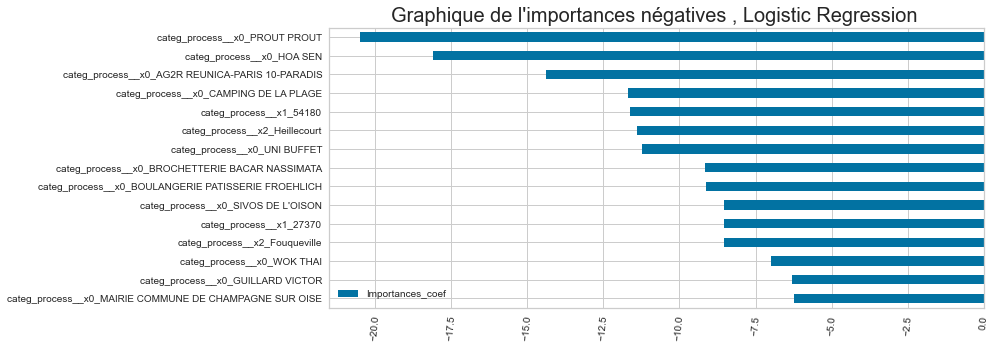

In [39]:
fig, ax = plt.subplots(figsize =(14,5))
df_coef_log_moins_15.plot.barh(ax=ax)
ax.set_title("Graphique de l'importances négatives , Logistic Regression ", fontsize =20)
plt.xticks(rotation =85)
fig.tight_layout()

## Commentaire:
Là encore, les facteurs qui influencent négativement la prédiction des classes sont entre autres **Prout Prout**, **Hoa sen**. 

## <font color="red" id="section_4_3" > 4.3  SGDClassifier
    
Lien documenation:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

### <font color="red" id="section_4_3_1" > 4.3.1  Optimisation hyperparams

In [40]:
t0 = time.time()
params_sgd = {'classifier__penalty': ['l1', "l2"],
             'classifier__loss': ['hinge', 'modified_huber', 'log_loss']}
pip_msgd = Pipeline([ ("preprocessor", preprocessor),
                     ('oversampling', SMOTE( random_state=  5)),
                     ('classifier', SGDClassifier(random_state = 5))
    
])
Gridsearch_sgd = GridSearchCV(pip_msgd,
                             params_sgd,
                             cv = 5,
                              verbose = 10,
                              n_jobs = -1
                            )
Gridsearch_sgd.fit(X_train, y_train)
print("Le temps elapsed:", time.time() - t0)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Le temps elapsed: 706.9941484928131


In [41]:
df_resultat_sgd = pd.DataFrame.from_dict(Gridsearch_sgd.cv_results_).sort_values(by= 'rank_test_score', ascending = True)
df_resultat_sgd.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__loss,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,77.605753,51.103231,6.467833,8.367580,modified_huber,l2,"{'classifier__loss': 'modified_huber', 'classi...",0.596668,0.606742,0.597830,0.597752,0.602209,0.600240,0.003766,1
2,83.786003,32.969887,1.673999,2.079548,modified_huber,l1,"{'classifier__loss': 'modified_huber', 'classi...",0.600930,0.601705,0.596087,0.595233,0.598140,0.598419,0.002560,2
1,62.917136,26.497126,7.825818,0.804329,hinge,l2,"{'classifier__loss': 'hinge', 'classifier__pen...",0.589500,0.591244,0.595893,0.586320,0.589227,0.590437,0.003153,3


In [42]:
df_resultat_sgd = affichage_result_optim(Gridsearch_sgd)

Le meileur score est: 0.6, 
Les meilleurs paramètres sont:{'classifier__loss': 'modified_huber', 'classifier__penalty': 'l2'} 
Le temps total moyen de fit est: 2231110.57


### <font color="red" id="section_4_3_2" > 4.3.2  Entrainement

In [43]:
model_sgd =  Pipeline([("preprocessor", preprocessor),
                      ('oversampling', SMOTE(random_state = 5)),
                      ('classifier', SGDClassifier(penalty = 'l2', loss = 'modified_huber', random_state = 5))
                      ])
model_sgd.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_process', MinMaxScaler(),
                                                  ['Adress_Rue',
                                                   'Adress_Avenue',
                                                   'Adress_Chemin',
                                                   'Adress_Place',
                                                   'Adress_Boulevard',
                                                   'Adress_Route',
                                                   'Adress_quai']),
                                                 ('categ_process',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['APP_Libelle_etablissement',
                                                   'Code_postal',
                                                   'Libelle_commune',
                                                   'filtre_activite'])])),
                ('oversampling', SMOTE(random_state=5)),
                ('classifier',
                 SGDClassifier(loss='modified_huber', random_state=5))])

### <font color="red" id="section_4_3_3" > 4.3.3  Prédiction et mesure de performance

In [44]:
y_pred_sgd = model_sgd.predict(X_test)
y_pred_sgd_train = model_sgd.predict(X_train)

In [45]:
print( "Le score de training vaut:", accuracy_score(y_train, y_pred_sgd_train))
print('-'*60)
print( "Le score de cohen_kappa vaut:", cohen_kappa_score(y_test, y_pred_sgd))
print('-'*60)
print(classification_report(y_test, y_pred_sgd))
print('-'*60)
print( "Le fbeta core vaut:", fbeta_score(y_test, y_pred_sgd,average = 'weighted', beta = 10))

Le score de training vaut: 0.9568738375697459
------------------------------------------------------------
Le score de cohen_kappa vaut: 0.247696969136166
------------------------------------------------------------
                   precision    recall  f1-score   support

     Satisfaisant       0.65      0.71      0.68      3600
Très satisfaisant       0.57      0.52      0.54      2485
 Urgent_Améliorer       0.23      0.17      0.20       368

         accuracy                           0.61      6453
        macro avg       0.48      0.47      0.47      6453
     weighted avg       0.60      0.61      0.60      6453

------------------------------------------------------------
Le fbeta core vaut: 0.6054718369916979


## Commentaire:

### <font color="red" id="section_4_3_4" > 4.3.4  Matrice de confusion

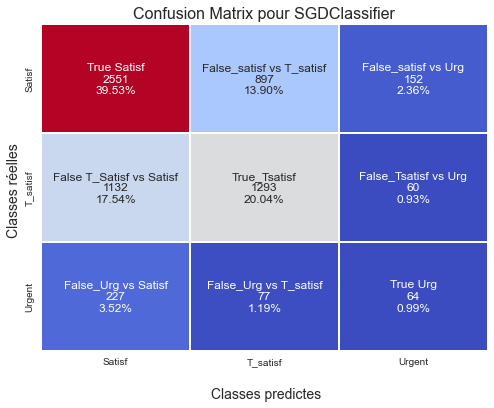

In [46]:
confusion_matrix_visual(y_pred_sgd, 'SGDClassifier')

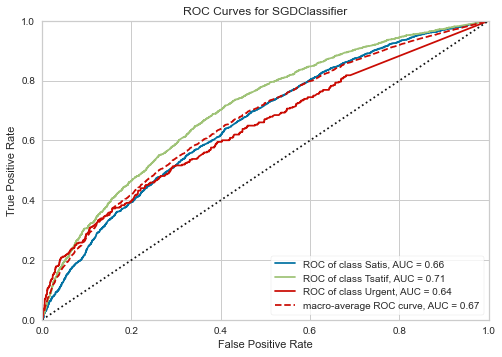

<AxesSubplot:title={'center':'ROC Curves for SGDClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
visualizer = ROCAUC(model_sgd, classes=["Satis", "Tsatif", "Urgent"], micro = False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       

## Commentaire:
Un modèle plutôt assez bon pour ce jeu de données car nous avons en moyenne **67%** de chance que le modèle classe correctement les éléments.

### <font color="red" id="section_4_3_5" > 4.3.5  Features importances

In [48]:
coef_sgd =  model_sgd.named_steps['classifier'].coef_[0] # Attention à ne prendr que la première composante
df_coef_sgd = pd.DataFrame(coef_sgd,index =get_feature_names(preprocessor), columns = ["Importances"]).\
sort_values(by = 'Importances', ascending = False)  #  get_feature_names(preprocessor)
df_coef_sgd.head(7) 

,Importances
categ_process__x3_Restaurant,1.315111
categ_process__x3_ Autres,1.179945
categ_process__x3_Boulangerie-Pâtisserie,1.154789
categ_process__x3_Boucherie-Charcuterie,1.132217
categ_process__x3_Alimentation générale,1.111347
categ_process__x3_Restauration collective,1.106355
categ_process__x3_ Abattoirs,1.078199


In [49]:
df_coef_sgd_7 = df_coef_sgd.iloc[:7]

### Visualisation des 7  features les plus impactantes

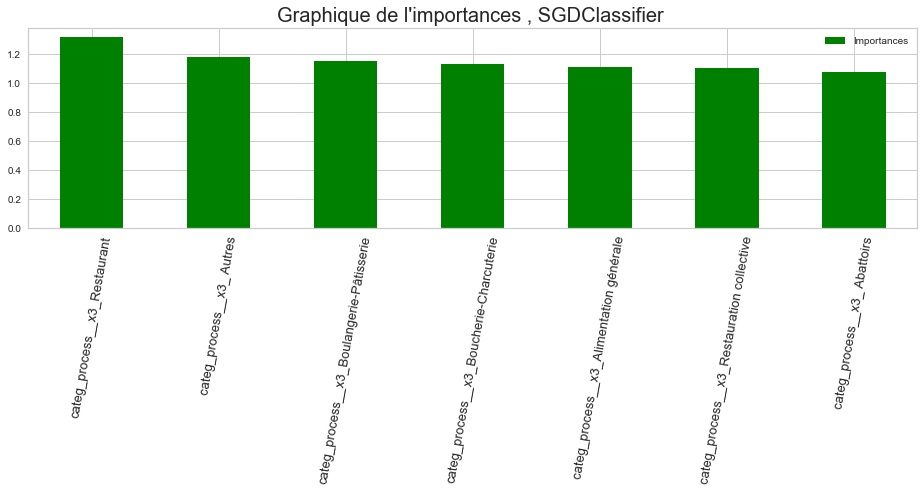

In [50]:
fig, ax = plt.subplots(figsize =(13,7))
df_coef_sgd_7.plot.bar(ax=ax, color = 'green')
ax.set_title("Graphique de l'importances , SGDClassifier ", fontsize =20)
plt.xticks(rotation =80, fontsize = 13)
fig.tight_layout()

## Commentaires: 

Pour le modèles **SGDClassifier**, les facteurs qui impactent plus sur la qualité de niveau de contrôle sanitaire sont entre autres le fait que l'établissement soit **restaurant**, **autres** ou **Boulangerie-pattisserie**.

## <font color="red" id="section_4_4" > 4.4  Reseau de neuronne
### <font color="red" id="section_4_4_1" > 4.4.1 Preparation de données

In [51]:
data_model_neu =  data_model_neu.sample(n = 15000, random_state = 5)
data_model_neu.head(2)

,APP_Libelle_etablissement,Code_postal,Libelle_commune,Synthese_eval_sanit,filtre_activite,Adress_Rue,Adress_Avenue,Adress_Chemin,Adress_Place,Adress_Boulevard,Adress_Route,Adress_quai
17838,ECOLE PRIMAIRE PUBLIQUE,46320,Livernon,Satisfaisant,Restauration collective,1,0,0,0,0,0,0
8945,FERME MARINE PAIMPOLAISE,22500,Paimpol,Satisfaisant,Produits de la mer et d'eau douce,1,0,0,0,0,0,0


In [52]:
    # variable cible
Target = data_model_neu['Synthese_eval_sanit']
data_model_neu.drop(columns = ['Synthese_eval_sanit'], inplace=True)


In [53]:
predictors= pd.get_dummies(data_model_neu)
# jeux d'entrainement et de test
X_train_neu, X_test_neu, y_train_neu, y_test_neu = train_test_split(predictors, Target, test_size=0.2, random_state=15)

# jeux d'entrainement et de validation
X_train_neu, X_val, y_train_neu, y_val = train_test_split(X_train_neu, y_train_neu, stratify = y_train_neu, test_size=0.2,
                                                  random_state=42)

## Commentaire:
 Le réseau de neuronne que nous allons développé devra reçevoir des valeurs numériques. Sur ce nous allons encoder les cibles par: 
 
* **Urgent_Améliorer** par  0


* **Satisfaisant** par  1


* **Très satisfaisant** par  2
 

In [54]:
# fonction de recodage
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

In [55]:
y_train_neu = pd.DataFrame(y_train_neu)
y_train_neu['Synthese_eval_sanit'] = coding(y_train_neu['Synthese_eval_sanit'], {'Urgent_Améliorer': 0,
                                                                         'Satisfaisant':1,'Très satisfaisant':2}) 
y_val = pd.DataFrame(y_val)
y_val["Synthese_eval_sanit"] = coding(y_val["Synthese_eval_sanit"], 
                                      {'Urgent_Améliorer': 0, 'Satisfaisant':1,'Très satisfaisant':2}) 

## Commentaire :
Ensuite, on convertit les  vecteur de classe (entiers) en matrice de classe binaire o ou 1.

In [56]:
y_train_neu_train = to_categorical(y_train_neu)
y_val_neu = to_categorical(y_val)
print(y_val_neu)
print('-'*70)
print("La dimension de X_train pour input_shape est: {}".format(X_train.shape))

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
----------------------------------------------------------------------
La dimension de X_train pour input_shape est: (25808, 11)


### <font color="red" id="section_4_4_2" > 4.4.2  Creation du modèle couche après couche

In [57]:
model_neu = Sequential()
# premiere couche 
model_neu.add(Dense(32, input_dim = X_train_neu.shape[1], activation = 'relu'))
model_neu.add(Dropout(0.5))
# Deuxieme couche
model_neu.add(Dense(32, activation='relu'))
model_neu.add(Dropout(0.5))
#3 ieme couche
model_neu.add(Dense(32, activation='relu'))
model_neu.add(Dropout(0.5))
# L'activation softmax pour la multiclassif
model_neu.add(Dense(3, activation='softmax'))

## Commentaire :

* **Softmax**  est souvent utilisé comme activation pour la dernière couche d'un réseau de classification car le résultat pourrait être interprété comme une distribution de probabilité.

    * **Syntaxe**: model.add(Dense(num_classes, activation='softmax'))


* La couche **Dropout** définit de manière aléatoire les unités d'entrée sur 0 avec une fréquence de rate à chaque étape pendant la durée de la formation, ce qui permet d'éviter le surajustement.

    * **Syntaxe**: model.Dropout(rate, noise_shape=None, seed=None, **kwargs)

In [58]:
model_neu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                740544    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 9

In [59]:
model_neu.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_neu.fit(X_train_neu,y_train_neu_train, epochs = 40, validation_data =(X_val, y_val_neu), verbose = 1 )

Epoch 1/40
300/300 [==============================] - 23s 70ms/step - loss: 0.9148 - accuracy: 0.5294 - val_loss: 0.8572 - val_accuracy: 0.5483
Epoch 2/40
300/300 [==============================] - 17s 55ms/step - loss: 0.8491 - accuracy: 0.5605 - val_loss: 0.8392 - val_accuracy: 0.5863
Epoch 3/40
300/300 [==============================] - 12s 41ms/step - loss: 0.7525 - accuracy: 0.6681 - val_loss: 0.8643 - val_accuracy: 0.5858
Epoch 4/40
300/300 [==============================] - 11s 36ms/step - loss: 0.6147 - accuracy: 0.7657 - val_loss: 0.9253 - val_accuracy: 0.5683
Epoch 5/40
300/300 [==============================] - 10s 32ms/step - loss: 0.4843 - accuracy: 0.8231 - val_loss: 1.0426 - val_accuracy: 0.5621
Epoch 6/40
300/300 [==============================] - 9s 31ms/step - loss: 0.3820 - accuracy: 0.8611 - val_loss: 1.2127 - val_accuracy: 0.5292
Epoch 7/40
300/300 [==============================] - 9s 31ms/step - loss: 0.3021 - accuracy: 0.8850 - val_loss: 1.3788 - val_accuracy: 0

In [60]:
predictions = model_neu.predict(X_val) 
predictions = np.argmax(predictions, axis=1)  # Renvoie les indices des valeurs maximales le long d'un axe.
predictions

75/75 [==============================] - 2s 14ms/step


array([1, 2, 2, ..., 0, 2, 2], dtype=int64)

In [61]:
predictions

array([1, 2, 2, ..., 0, 2, 2], dtype=int64)

In [62]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.08      0.11      0.09       143
           1       0.62      0.53      0.57      1316
           2       0.49      0.56      0.52       941

    accuracy                           0.52      2400
   macro avg       0.40      0.40      0.39      2400
weighted avg       0.54      0.52      0.52      2400



## Comentaire: 
Ce modéle ne s'est pas du tout adapté a notre jeu de données. Il a un **accuracy** de seulement de **43%** moins qu'un modéle purement aléatoire.

## <font color="red" id="section_4_5" > 4.5  Random Forest Classifier
Lien https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
### <font color="red" id="section_4_5_1" > 4.5.1 Optimisation d'hyperparamètres

In [63]:
t0 = time.time()
param_rfr = {"classifier__max_features": ['sqrt', 'log2'],
            "classifier__n_estimators": [100, 200, 300]}
Pip_rfr = Pipeline([('preprocessor', preprocessor),
                  ('oversampling', SMOTE(random_state = 1, sampling_strategy = 'auto')),
                  ('classifier', RandomForestClassifier(random_state = 5, max_depth = 15, class_weight = 'balanced'))])
Grid_cv_rfr = GridSearchCV(Pip_rfr,
                            param_rfr,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 1)
Grid_cv_rfr.fit(X_train, y_train)
print("Le temps elapsed:", time.time() - t0)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Le temps elapsed: 714.8995862007141


In [71]:
df_resultat_rfr = pd.DataFrame.from_dict(Grid_cv_rfr.cv_results_).sort_values( by = ['rank_test_score'], ascending = True)
df_resultat_rfr.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_features,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,57.103865,29.066439,0.693398,0.208518,log2,300,"{'classifier__max_features': 'log2', 'classifi...",0.562379,0.581170,0.558117,0.569463,0.584577,0.571141,0.010299,1
4,61.724989,15.226339,1.528881,1.177574,log2,200,"{'classifier__max_features': 'log2', 'classifi...",0.558698,0.573034,0.550562,0.574695,0.568882,0.565174,0.009183,2
1,78.469417,23.607824,0.793659,0.107933,sqrt,200,"{'classifier__max_features': 'sqrt', 'classifi...",0.569353,0.545138,0.565285,0.577795,0.537686,0.559051,0.015142,3


In [72]:
df_resultat_rfc= affichage_result_optim(Grid_cv_rfr)

Le meileur score est: 0.57, 
Les meilleurs paramètres sont:{'classifier__max_features': 'log2', 'classifier__n_estimators': 300} 
Le temps total moyen de fit est: 2217485.44


### <font color="red" id="section_4_5_2" > 4.5.2 Entrainement et prédiction

In [75]:
model_rfc = Pipeline([('preprocessor', preprocessor),
                  ('oversampling', SMOTE(random_state = 1, sampling_strategy = 'auto')),
                  ('classifier', RandomForestClassifier(max_features ='log2',
                                                        n_estimators = 300,
                                                        random_state = 5,
                                                        max_depth = 15,
                                                        class_weight = 'balanced'))])
model_rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_process', MinMaxScaler(),
                                                  ['Adress_Rue',
                                                   'Adress_Avenue',
                                                   'Adress_Chemin',
                                                   'Adress_Place',
                                                   'Adress_Boulevard',
                                                   'Adress_Route',
                                                   'Adress_quai']),
                                                 ('categ_process',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['APP_Libelle_etablissement',
                                                   'Code_postal',
                                                   'Libelle_commune',
                                                   'filtre_activite'])])),
                ('oversampling', SMOTE(random_state=1)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        max_features='log2', n_estimators=300,
                                        random_state=5))])

In [78]:
y_pred_rfc = model_rfc.predict(X_test)

### <font color="red" id="section_4_5_3" > 4.5.3 Mesure de performance

In [82]:
print(classification_report(y_test, y_pred_rfc))

                   precision    recall  f1-score   support

     Satisfaisant       0.63      0.74      0.68      3600
Très satisfaisant       0.57      0.46      0.51      2485
 Urgent_Améliorer       0.19      0.11      0.14       368

         accuracy                           0.60      6453
        macro avg       0.46      0.44      0.44      6453
     weighted avg       0.58      0.60      0.58      6453



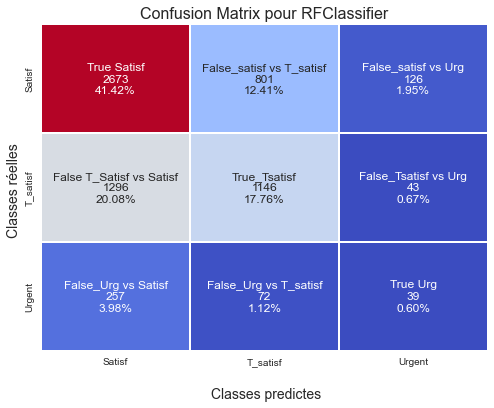

In [83]:
confusion_matrix_visual(y_pred_rfc, 'RFClassifier')

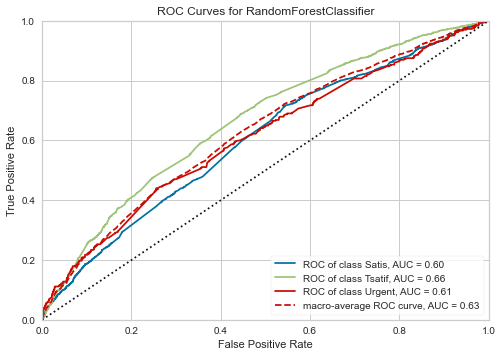

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [85]:
visualizer = ROCAUC(model_rfc, classes=["Satis", "Tsatif", "Urgent"], micro = False)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       

# Commentaire: 

* En utilisant les metrics via SKLEARN, nous recoltons un score d'accuracy de **60%**, ce qui signifie qu'il ** 6 chance sur 10** que le modéle classe correctement dans la bonne catégorie. C'est pluôt assez bon.


* Sur la **matrice de confusion**, on peut juste remarquer que le modéle différecie diffcilement les cibles **Trés satisfaisant** et **Satisfaisant**. Il reconnait à **76%** les **satisfaisant et à **46%** les **Trés satisfaisant**.



* En fin, la librairies yellowbrick revient à confirmer les scores. Avec la stratégie un contre tous **OVO**, le score moyen global est  **63%**; ce qui rime parfaitement avec les metriques trouvées plus haut.

### <font color="red" id="section_4_5_4" > 4.5.4  Features importances

In [102]:
coef_rfc =  model_rfc.named_steps['classifier'].feature_importances_ 
df_coef_rfc = pd.DataFrame(coef_rfc,index =get_feature_names(preprocessor), columns = ["Importances"]).\
sort_values(by = 'Importances', ascending = False)  #  get_feature_names(preprocessor)
df_coef_rfc.head(7) 

,Importances
categ_process__x3_Restauration collective,0.008630
categ_process__x3_Restaurant,0.007625
categ_process__x2_Fouqueville,0.006169
categ_process__x1_54180,0.006025
categ_process__x2_Sarzeau,0.005772
categ_process__x2_Sarreguemines,0.005224
categ_process__x3_ Produits de la mer et d'eau douce,0.005036


In [103]:
df_coef_rfc_10 = df_coef_rfc.iloc[:10]

### Visualisation des 10  features les plus impactantes avant mis à l'echelle

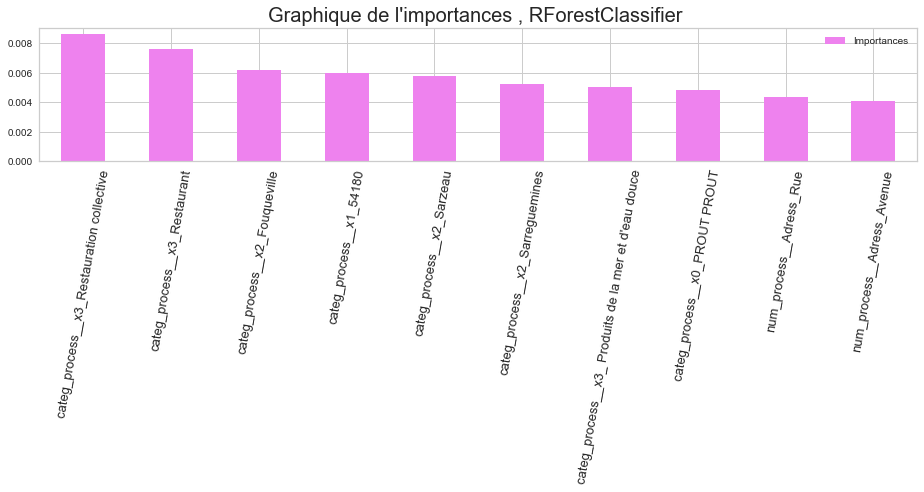

In [105]:
fig, ax = plt.subplots(figsize =(13,7))
df_coef_rfc_10.plot.bar( ax=ax, color = 'violet')
ax.set_title("Graphique de l'importances , RForestClassifier ", fontsize =20)
plt.xticks(rotation =80, fontsize = 13)
fig.tight_layout()

### Visualisation des 10  features les plus impactantes après mise à l'echelle

Il faut d'abord metre à l'echelle, les impoortances avant de visulier en multipliant la **valeurs de l'importances** avec **l'ecart-type**.

In [106]:
std = np.std([tree.feature_importances_ for tree in model_rfc.named_steps['classifier'].estimators_ ], axis=0)

In [107]:
std_10 =std[:10]

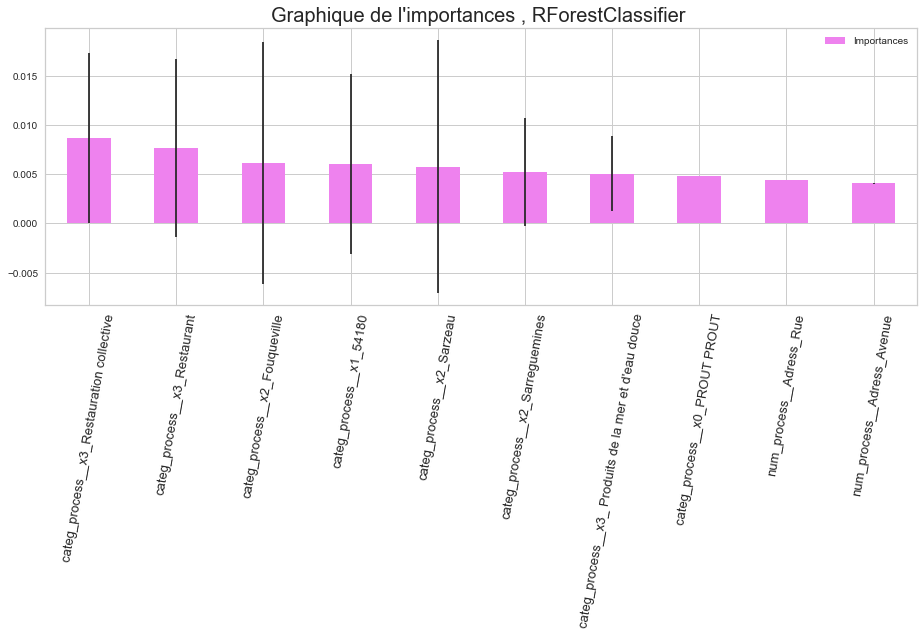

In [108]:
fig, ax = plt.subplots(figsize =(13,9))
df_coef_rfc_10.plot.bar(yerr = std_10, ax=ax, color = 'violet')
ax.set_title("Graphique de l'importances , RForestClassifier ", fontsize =20)
plt.xticks(rotation =80, fontsize = 13)
fig.tight_layout()

## Commentaire : 

Pour le modèle **Random Forest Classifier**, les facteurs qui influence plus sur le **niveau sanitaire des établissement** est le fait celui-ci soit **une restauration collective**, **Restaurant**.

## <font color="red" id="section_4_6" > 4.6  LGBMClassifier